Tabel data konsumsi bahan bakar:
+-------+----------+----------+----------+----------+----------+
|   Oli |   Truk 1 |   Truk 2 |   Truk 3 |   Truk 4 |   Truk 5 |
+=======+==========+==========+==========+==========+==========+
|     1 |    0.5   |    0.634 |    0.487 |    0.329 |    0.512 |
+-------+----------+----------+----------+----------+----------+
|     2 |    0.535 |    0.675 |    0.52  |    0.435 |    0.54  |
+-------+----------+----------+----------+----------+----------+
|     3 |    0.513 |    0.595 |    0.488 |    0.4   |    0.51  |
+-------+----------+----------+----------+----------+----------+

Mengurutkan data untuk memudahkan perhitungan ANOVA:


,Oli,Truk,Konsumsi_Bahan_Bakar
0,1,1,0.500
1,1,2,0.634
2,1,3,0.487
3,1,4,0.329
4,1,5,0.512
5,2,1,0.535
6,2,2,0.675
7,2,3,0.520
8,2,4,0.435
9,2,5,0.540


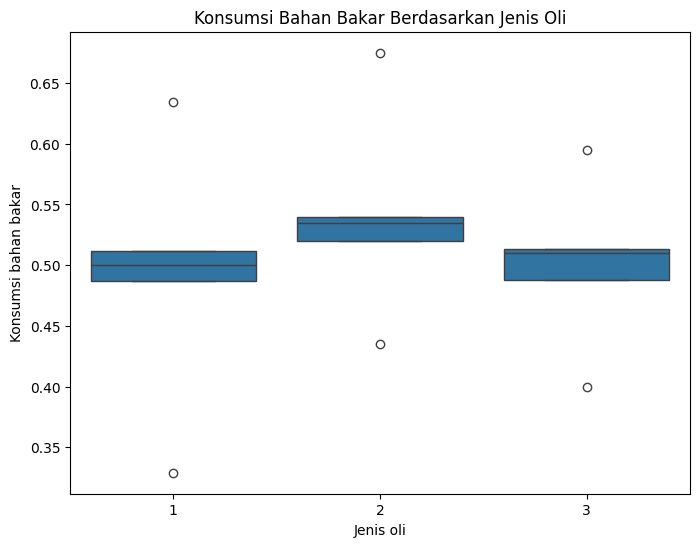

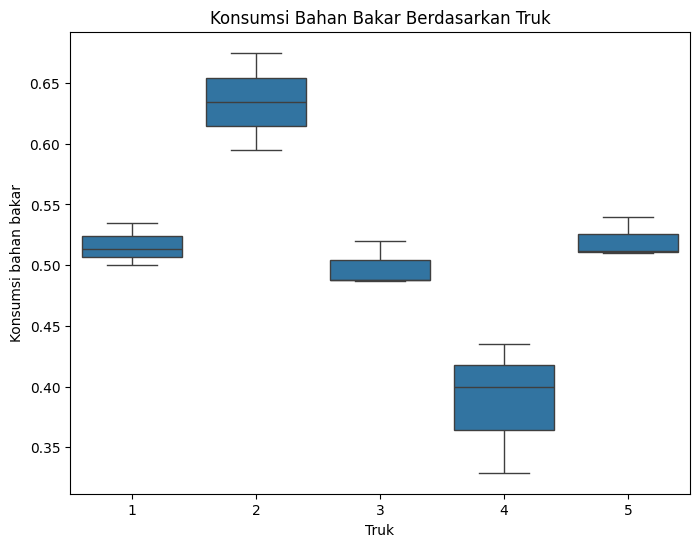

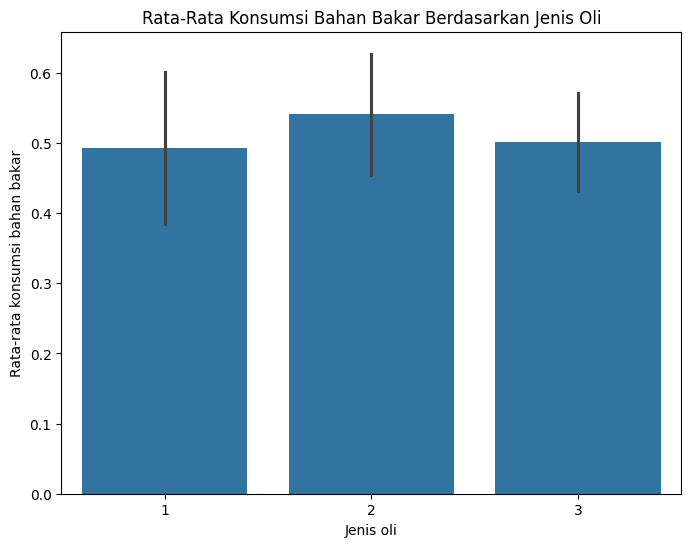

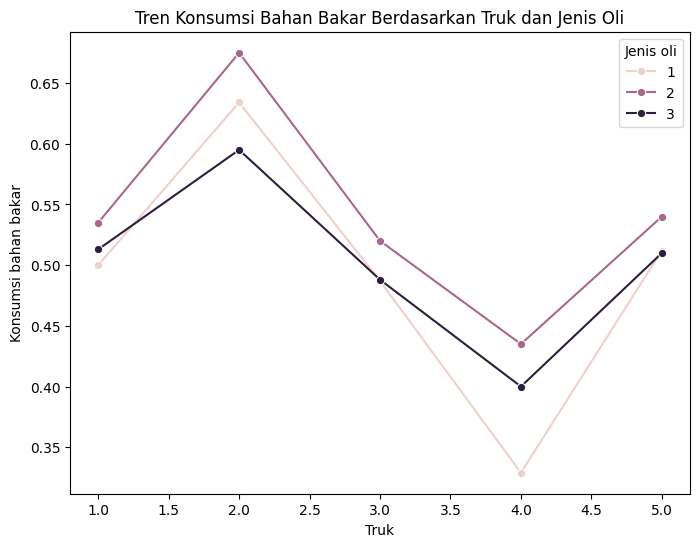

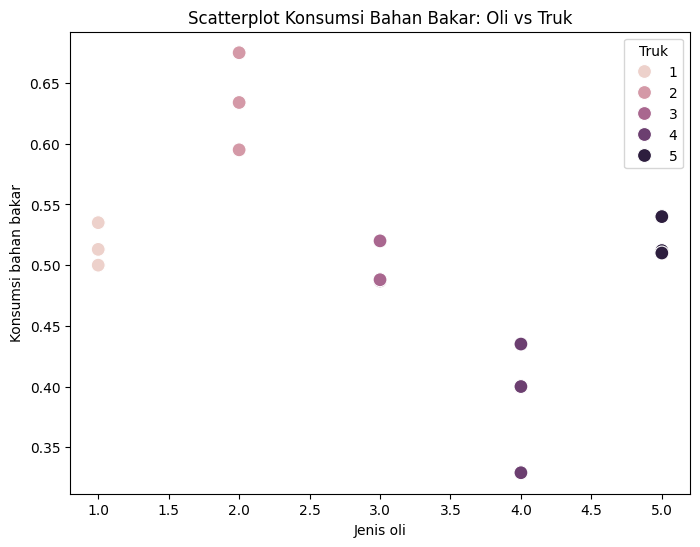


Tabel ANOVA:
+----------+------------------+----------------------+---------------+-----------+---------------+--------------+
|          |   Sum of Squares |   Degrees of Freedom |   Mean Square |   F-value |       p-value |   F-critical |
+==========+==================+======================+===============+===========+===============+==============+
| C(Oli)   |       0.00670573 |                    2 |   0.00335287  |   6.35273 |   0.0222854   |      4.45897 |
+----------+------------------+----------------------+---------------+-----------+---------------+--------------+
| C(Truk)  |       0.0920997  |                    4 |   0.0230249   |  43.6257  |   1.78134e-05 |      3.83785 |
+----------+------------------+----------------------+---------------+-----------+---------------+--------------+
| Residual |       0.00422227 |                    8 |   0.000527783 | nan       | nan           |      3.4381  |
+----------+------------------+----------------------+---------------+----

In [67]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from tabulate import tabulate
from statsmodels.formula.api import ols
from scipy.stats import f

# Menampilkan tabel menggunakan tabulate
print("Tabel data konsumsi bahan bakar:")
tabel = [
    ["Oli", "Truk 1", "Truk 2", "Truk 3", "Truk 4", "Truk 5"],
    [1, 0.500, 0.634, 0.487, 0.329, 0.512],
    [2, 0.535, 0.675, 0.520, 0.435, 0.540],
    [3, 0.513, 0.595, 0.488, 0.400, 0.510]
]

print(tabulate(tabel, headers="firstrow", tablefmt="grid"))

print("\nMengurutkan data untuk memudahkan perhitungan ANOVA:") 
data = {
    'Oli': [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3],
    'Truk': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'Konsumsi_Bahan_Bakar': [0.500, 0.634, 0.487, 0.329, 0.512, 0.535, 0.675, 0.520, 0.435, 0.540, 0.513, 0.595, 0.488, 0.400, 0.510]
}

df = pd.DataFrame(data)
display(df)

# Boxplot untuk Oli
plt.figure(figsize=(8, 6))
sns.boxplot(x='Oli', y='Konsumsi_Bahan_Bakar', data=df)
plt.title('Konsumsi Bahan Bakar Berdasarkan Jenis Oli')
plt.xlabel('Jenis oli')
plt.ylabel('Konsumsi bahan bakar')
plt.show()

# Boxplot untuk Truk
plt.figure(figsize=(8, 6))
sns.boxplot(x='Truk', y='Konsumsi_Bahan_Bakar', data=df)
plt.title('Konsumsi Bahan Bakar Berdasarkan Truk')
plt.xlabel('Truk')
plt.ylabel('Konsumsi bahan bakar')
plt.show()

# Barplot untuk rata-rata konsumsi bahan bakar berdasarkan Oil
plt.figure(figsize=(8, 6))
sns.barplot(x='Oli', y='Konsumsi_Bahan_Bakar', data=df, estimator='mean', errorbar='sd')
plt.title('Rata-Rata Konsumsi Bahan Bakar Berdasarkan Jenis Oli')
plt.xlabel('Jenis oli')
plt.ylabel('Rata-rata konsumsi bahan bakar')
plt.show()

# Lineplot untuk tren konsumsi bahan bakar
plt.figure(figsize=(8, 6))
sns.lineplot(x='Truk', y='Konsumsi_Bahan_Bakar', hue='Oli', data=df, marker='o')
plt.title('Tren Konsumsi Bahan Bakar Berdasarkan Truk dan Jenis Oli')
plt.xlabel('Truk')
plt.ylabel('Konsumsi bahan bakar')
plt.legend(title='Jenis oli')
plt.show()

# Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Truk', y='Konsumsi_Bahan_Bakar', hue='Truk', data=df, s=100)
plt.title('Scatterplot Konsumsi Bahan Bakar: Oli vs Truk')
plt.xlabel('Jenis oli')
plt.ylabel('Konsumsi bahan bakar')
plt.legend(title='Truk')
plt.show()

# Membuat model ANOVA
model = ols('Konsumsi_Bahan_Bakar ~ C(Oli) + C(Truk)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Mengganti nama kolom
anova_table_renamed = anova_table.rename(columns={
    'sum_sq': 'Sum of Squares',
    'df': 'Degrees of Freedom',
    'F': 'F-value',
    'PR(>F)': 'p-value'
})

# Menambahkan kolom Mean Square
anova_table_renamed['Mean Square'] = anova_table_renamed['Sum of Squares'] / anova_table_renamed['Degrees of Freedom']

# Menghitung F-critical
alpha = 0.05  # Tingkat signifikansi
anova_table_renamed['F-critical'] = f.ppf(1 - alpha, anova_table_renamed['Degrees of Freedom'], anova_table_renamed.loc['Residual', 'Degrees of Freedom'])

new_column_order = ['Sum of Squares', 'Degrees of Freedom', 'Mean Square', 'F-value', 'p-value', 'F-critical']
anova_table_reordered = anova_table_renamed[new_column_order]

print("\nTabel ANOVA:")
#print(anova_table_renamed.to_string())
print(tabulate(anova_table_reordered, headers='keys', tablefmt='grid'))





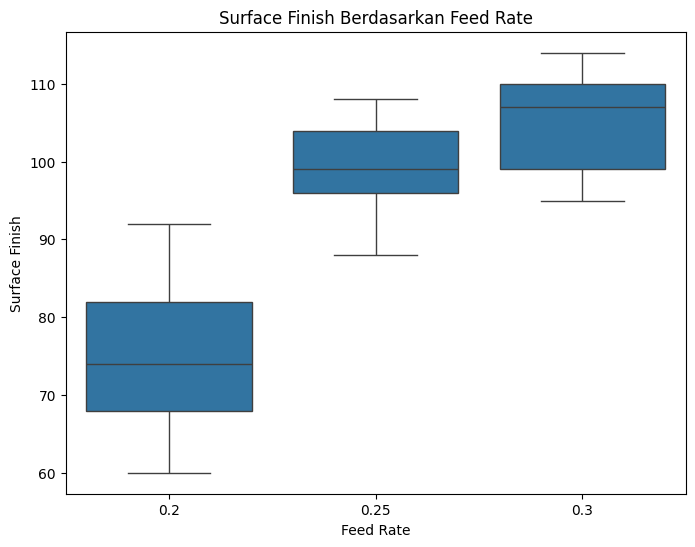

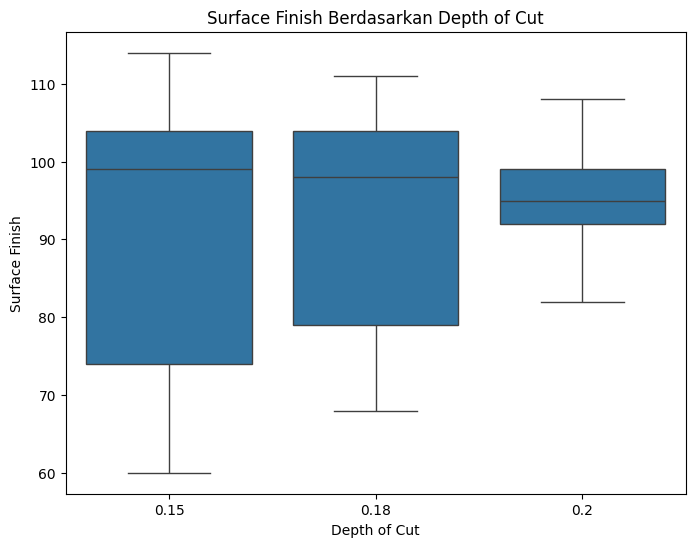

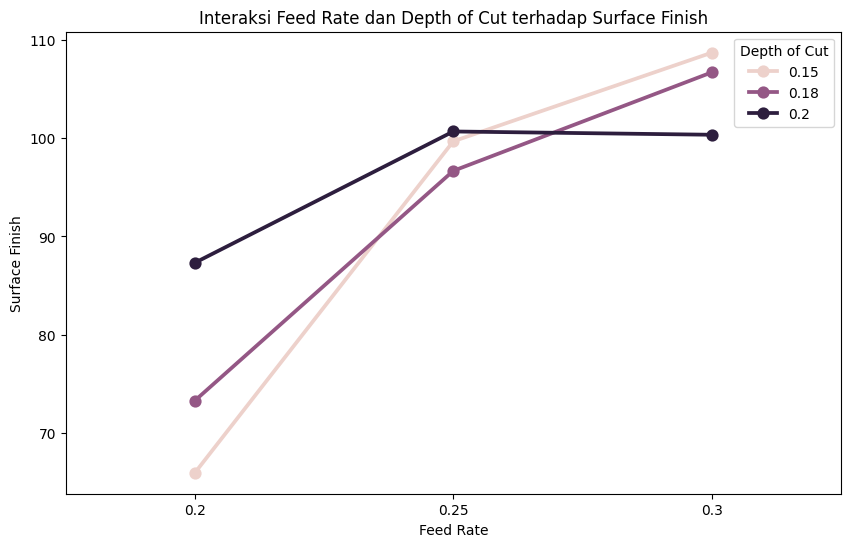

Tabel ANOVA:
+----------------------------------------+----------+------+-----------+---------------+
|                                        |   sum_sq |   df |         F |        PR(>F) |
+========================================+==========+======+===========+===============+
| C(Q("Feed Rate"))                      | 4405.41  |    2 |  58.1928  |   1.38765e-08 |
+----------------------------------------+----------+------+-----------+---------------+
| C(Q("Depth of Cut"))                   |  112.519 |    2 |   1.4863  |   0.252686    |
+----------------------------------------+----------+------+-----------+---------------+
| C(Q("Feed Rate")):C(Q("Depth of Cut")) |  731.926 |    4 |   4.83415 |   0.00796417  |
+----------------------------------------+----------+------+-----------+---------------+
| Residual                               |  681.333 |   18 | nan       | nan           |
+----------------------------------------+----------+------+-----------+---------------+


In [75]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Data
data = {
    'Feed Rate': [0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20,
                  0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
                  0.30, 0.30, 0.30, 0.30, 0.30, 0.30, 0.30, 0.30, 0.30],
    'Depth of Cut': [0.15, 0.15, 0.15, 0.18, 0.18, 0.18, 0.20, 0.20, 0.20,
                     0.15, 0.15, 0.15, 0.18, 0.18, 0.18, 0.20, 0.20, 0.20,
                     0.15, 0.15, 0.15, 0.18, 0.18, 0.18, 0.20, 0.20, 0.20],
    'Surface Finish': [74, 64, 60, 79, 68, 73, 82, 88, 92, 99, 104, 96, 98, 104, 88, 99, 108, 95, 104, 108, 114, 99, 110, 111, 95, 99, 107]
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Boxplot untuk Feed Rate
plt.figure(figsize=(8, 6))
sns.boxplot(x='Feed Rate', y='Surface Finish', data=df)
plt.title('Surface Finish Berdasarkan Feed Rate')
plt.show()

# Boxplot untuk Depth of Cut
plt.figure(figsize=(8, 6))
sns.boxplot(x='Depth of Cut', y='Surface Finish', data=df)
plt.title('Surface Finish Berdasarkan Depth of Cut')
plt.show()

# Interaction Plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Feed Rate', y='Surface Finish', hue='Depth of Cut', data=df, errorbar=None)
plt.title('Interaksi Feed Rate dan Depth of Cut terhadap Surface Finish')
plt.show()

# Membuat model ANOVA
model = ols('Q("Surface Finish") ~ C(Q("Feed Rate")) + C(Q("Depth of Cut")) + C(Q("Feed Rate")):C(Q("Depth of Cut"))', data=df).fit()

# Menampilkan tabel ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print("Tabel ANOVA:")
print(tabulate(anova_table, headers='keys', tablefmt='grid'))